In [1]:
from utils import *
from matplotlib import pyplot as plt

In [12]:
# 0. Configuration Settings
which_dataset = 4    # 'iris'=0 'crop'=1 'adult'=2 'breast'=3 'nursery'=4 'mushroom'=5

which_model = 4      # 'Decision_Tree' = 0, 'Logistic_Regression = 1', 'Multinomial_Naive_Bayes=2',
                     # 'K_Nearest_Neeighbor = 3', 'Random_Forest = 4', 'Multilayer_Perceptron = 5'

explanation_tool = 0 # 'Lime=0' 'Shap=1'

In [15]:
# This is the number of auxiliary datasets to experiment on. 
# Lower the number for a lower runtime.
how_many_sets = 2
# Size of auxiliary dataset (per class) in a list format (n in the paper) 
sample_set_sizes = [5]
# Number of features explored in a list format (k in the paper)
nfe = [3] 
query_limit = [1000] 

In [16]:
# Datasets are manually set here
accuracies, rtest_sims, samples_mega, other_args = run_attack_auto(4, which_model, explanation_tool, 
                                                                       how_many_sets, sample_set_sizes, nfe, query_limit, False)
accuracies2, rtest_sims2, samples_mega2, other_args2 = run_attack_auto(2, which_model, explanation_tool, 
                                                                       how_many_sets, sample_set_sizes, nfe, query_limit, False)

Train results
[[3228    0    0]
 [   0 3198    0]
 [   0    0 3294]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3228
           1       1.00      1.00      1.00      3198
           2       1.00      1.00      1.00      3294

    accuracy                           1.00      9720
   macro avg       1.00      1.00      1.00      9720
weighted avg       1.00      1.00      1.00      9720

Test results
[[634   0   0]
 [  0 630  15]
 [  0  24 641]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       634
           1       0.96      0.98      0.97       645
           2       0.98      0.96      0.97       665

    accuracy                           0.98      1944
   macro avg       0.98      0.98      0.98      1944
weighted avg       0.98      0.98      0.98      1944

Model test accuracy:  0.9799 

Dataset:   Nursery
ML Model:  Random Forest
LIME is the explanation tool curren

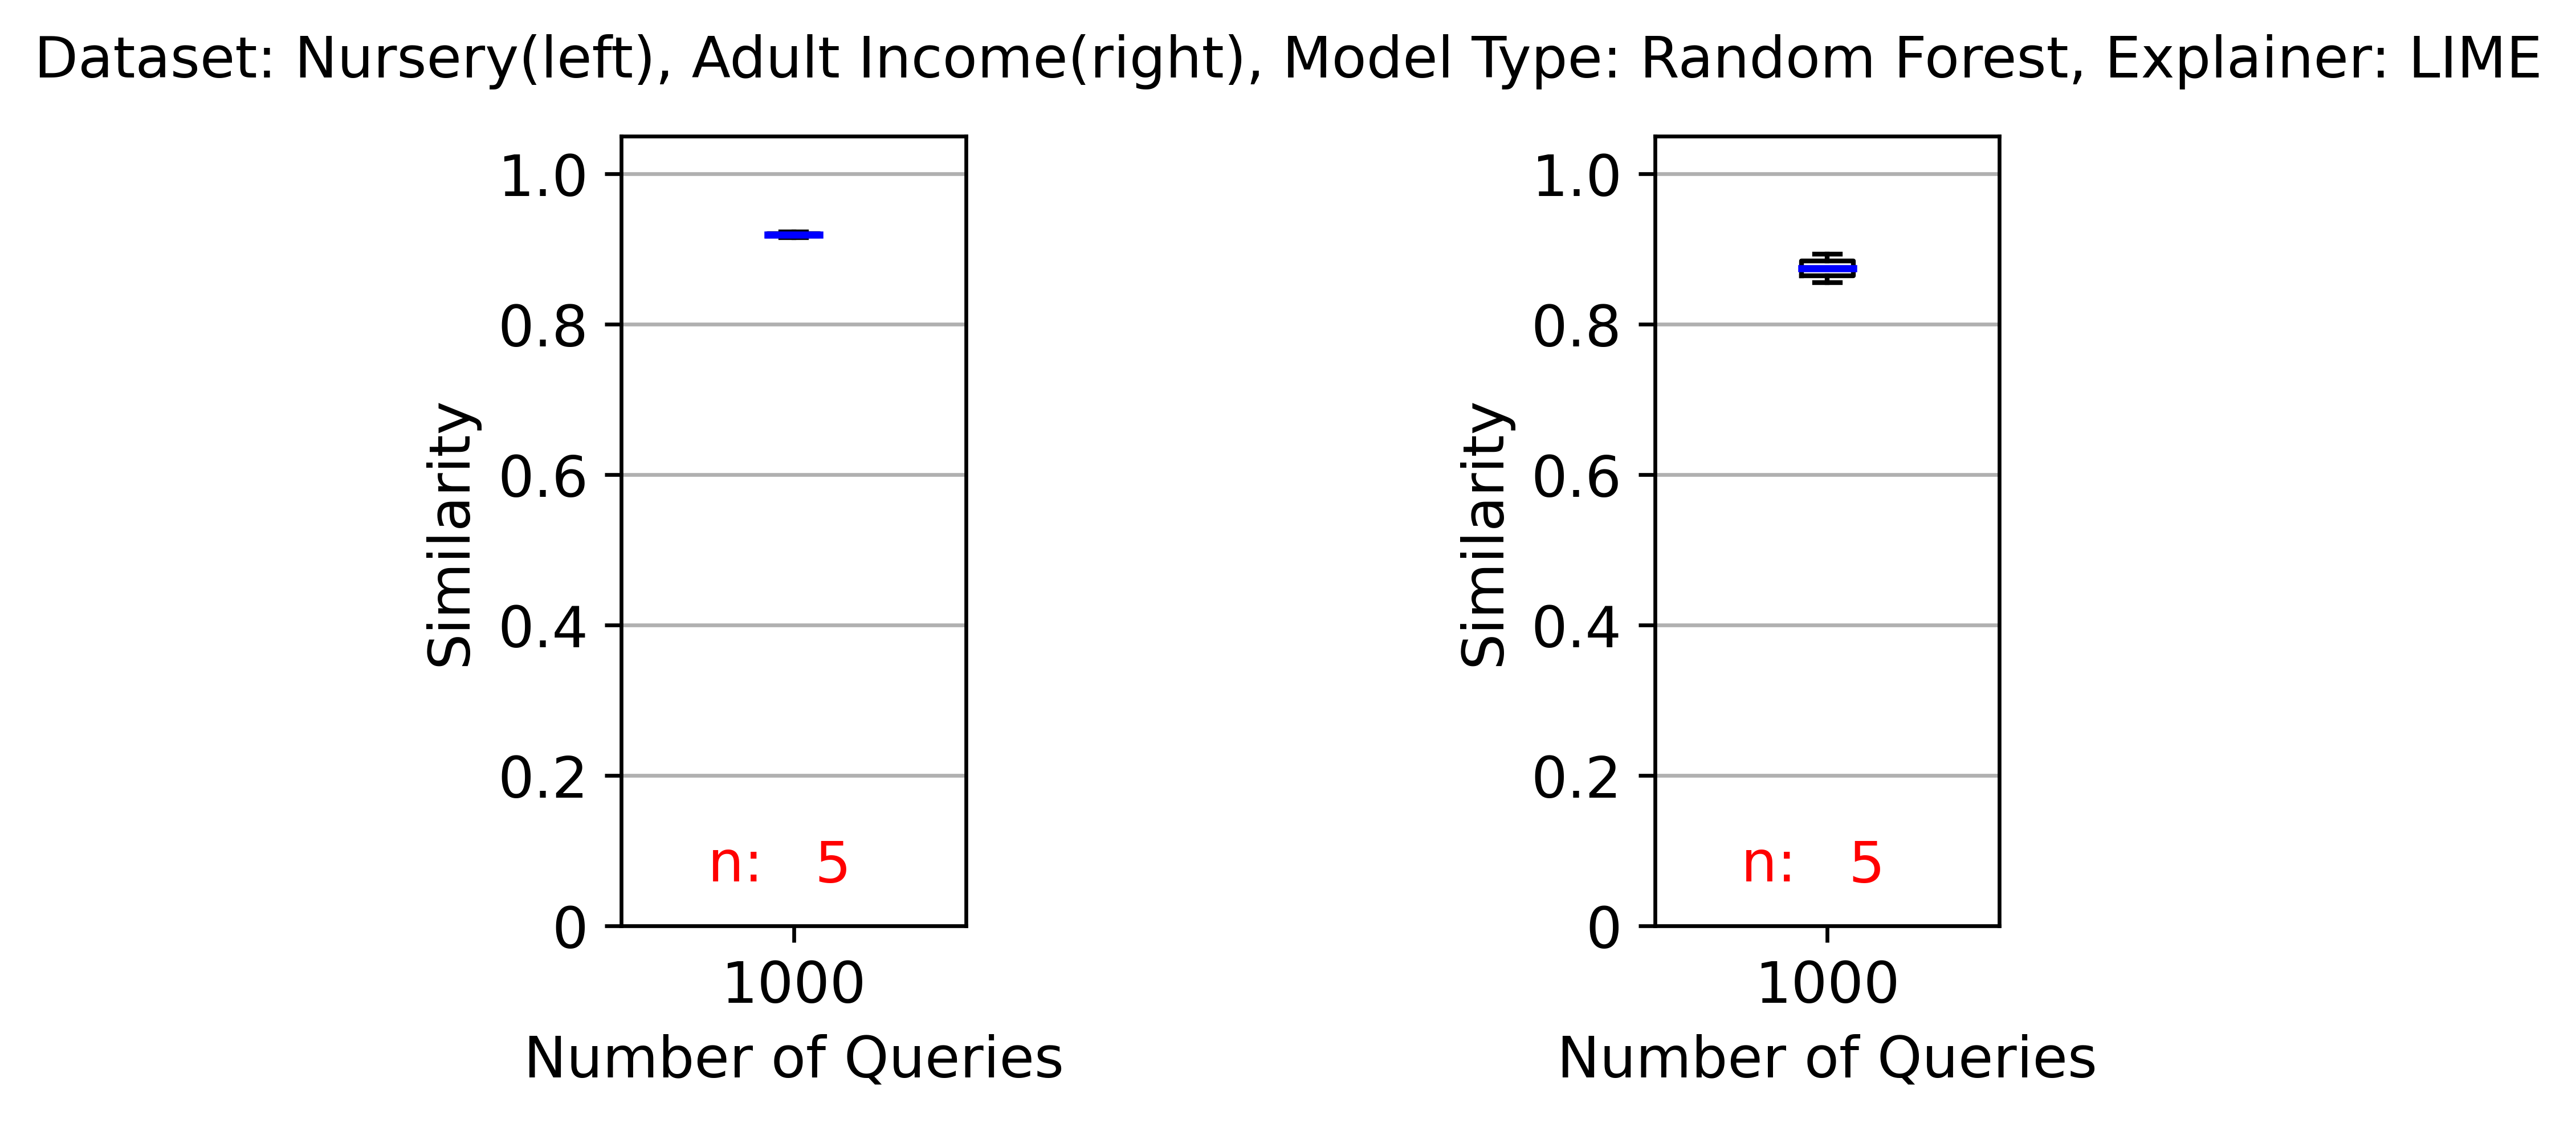

In [38]:
import matplotlib.pyplot as plt

isSim = True  # Toggle between similarity and accuracy

# Prepare x-axis values based on query limits and sample sizes
x_axis = []
y_axis = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
dataset_dict, model_dict, exp_dict = load_experiment_dicts()  # Load the experiment dictionaries

n = len(sample_set_sizes)
q = len(query_limit)
for i in range(n):
    x_axis += query_limit

tmp = n * q

# Set figure DPI and create subplots
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2 * (tmp * 0.6 + 1) + 2, 3))  # Create two subplots side by side

# Adjust space between subplots
plt.subplots_adjust(wspace=2)  # Increase this value to add more space

# Set plot title using the experiment details
fig.suptitle(f'Dataset: {dataset_dict.get(4)}(left), {dataset_dict.get(2)}(right), '
             f'Model Type: {model_dict.get(which_model)}, '
             f'Explainer: {exp_dict.get(explanation_tool)}', color='black')

# Customize the median line properties for the boxplot
medianprops = dict(linewidth=1.5, color='blue')

# Plot the first subplot
if isSim:
    ax1.boxplot(rtest_sims, 0, '', medianprops=medianprops)
else:
    ax1.boxplot(accuracies, 0, '', medianprops=medianprops)

# Plot the second subplot
if isSim:
    ax2.boxplot(rtest_sims2, 0, '', medianprops=medianprops)
else:
    ax2.boxplot(accuracies2, 0, '', medianprops=medianprops)

# Common settings for both subplots
for ax in (ax1, ax2):
    ax.yaxis.grid(True)
    ax.set_xticklabels(x_axis, fontsize=12)
    ax.set_ylim(0, 1.05)
    ax.set_yticklabels(y_axis, fontsize=12)
    ax.set_xlabel('Number of Queries', fontsize=12)

    label = 'n: '
    ax.annotate(label, 
                 (0.75,0.06), 
                 textcoords="offset points", # how to position the text
                 xytext=(0,0), # distance from text to points (x,y)
                 ha='left', fontsize=12, color='red')
    # Annotate sample sizes
    for x in range(n):
        label = str(sample_set_sizes[x])
        ax.annotate(label, 
                    (q * (x + 1) + 0.1, 0.05), 
                    textcoords="offset points", 
                    xytext=(1, 1.3), 
                    ha='center', fontsize=12, color='red')
    
    # Add vertical lines to separate sample sets
    for i in range(n - 1):
        ax.axvline(x=q * (i + 1) + 0.5, color='black')
    
    # Add horizontal line for accuracy
    if not isSim:
        ax.axhline(y=t_accuracy, color='green')

# Set y-axis labels differently for the two subplots
ax1.set_ylabel('Similarity' if isSim else 'Accuracy', fontsize=12)
ax2.set_ylabel('Similarity' if isSim else 'Accuracy', fontsize=12)

# Display the plot
plt.show()